## Google Data Analytics Capstone - Case Study 2_ How can a wellness technology company play it smart

I will use the steps of data analysis to ensure its completion. The steps will be as follow
1) Ask 
2) Prepare 
3) Process 
4) Analyse 
5) Share 
6) Act 

### 1) Ask Phase

I am a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. I have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights I discover will then help guide marketing strategy for the company. I will present my analysis to the Bellabeat executive team along with my high-level recommendations for Bellabeat’s marketing strategy.

### What is the problem I am trying to solve ? 

Explore new opportunities for Bellabeat by analysing non-Bellabeat smart devices. Apply insights from the smart devices usage data so as to provide recommendations to Bellabeat marketing strategy.

### How can my insights drive business decisions ? 

Insights will allow for new growth opportunites to be explored so as to unlock new features in their products as well as remain competitive in the market. 


### Deliverable

A clear statement of the business task will be to identify trends/habits and usage of smart devices among users in the market today. 



### 2) Prepare Phase 

### Where is your data stored ? 

This project uses dataset from Kaggle which contains personal fitness tracker from thirty three fitbit users. 

How is the data organised ? 

The data is organises in a long format where each row represent daily activity of each user.

### Are there issues with bias or credibility in this data ?  Does your data ROCCC ? 

Reliable

Dataset does not seems comprehensive as the 33 fitbit users is not enough to represent the entire users base of fitbit. Additional data will be needed for further analysis to corroborate with existing dataset.

Original

It is orginal as the data comes from fitbit. 

Comprehensive 

The data is also comprehensive as it records the data from various features that is found in fitbit device. 

Current
The dataset is not current as it was recorded 6 years ago in 2016. Changes in user behaviour may have occurred. 

Cited 

The dataset is deemed to have been cited as there are no other indications. 



### 3) Process phase 
I have selected python for to analyse and visualise my dataset 

In order to check for data integrity or errors, I performed the following codes to check the data for errors and consistency and also to undertand the makeup of the dataset.


In [42]:
#importing various libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#importing dataset into Dataframe 
daily_activity = pd.read_csv('/Users/eric/Downloads/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [43]:
#base on the information, there are 940 entries
# ActivityDate is a object type which is immutable 
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [61]:
#changing ActivityDate from object to datetime format 
daily_activity['date'] = daily_activity['ActivityDate']
daily_activity['date'] = pd.to_datetime(daily_activity['date'])

#getting the day of the week in a new column 
daily_activity['day_of_week'] = daily_activity['date'].dt.day_name()


In [62]:
#Checking whether there are missing values in the dataset 
#all rows return a false indicating there are no missing values in the dataset
print(daily_activity.isna())
daily_activity.isna().nunique()

        Id  ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    False         False       False          False            False   
1    False         False       False          False            False   
2    False         False       False          False            False   
3    False         False       False          False            False   
4    False         False       False          False            False   
..     ...           ...         ...            ...              ...   
935  False         False       False          False            False   
936  False         False       False          False            False   
937  False         False       False          False            False   
938  False         False       False          False            False   
939  False         False       False          False            False   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       False               False       

Id                          1
ActivityDate                1
TotalSteps                  1
TotalDistance               1
TrackerDistance             1
LoggedActivitiesDistance    1
VeryActiveDistance          1
ModeratelyActiveDistance    1
LightActiveDistance         1
SedentaryActiveDistance     1
VeryActiveMinutes           1
FairlyActiveMinutes         1
LightlyActiveMinutes        1
SedentaryMinutes            1
Calories                    1
date                        1
total_active_time           1
total_logged_time           1
active_time_percent         1
day_of_week                 1
dtype: int64

### 4) Analyse & Share Phase 

Now that the data is stored properly and has been prepared for analysis, next I will be performing an analysis on it, including visualisations to communicate my findings. 

In [63]:
# Analyse on average, the porportion of time user spent being active based on the duration when fitbit
# device is worn 

daily_activity['total_active_time'] = (daily_activity['VeryActiveMinutes']+ daily_activity['FairlyActiveMinutes']+
                                                                            daily_activity['LightlyActiveMinutes'])
                                                                            


daily_activity['total_logged_time'] = (daily_activity['VeryActiveMinutes']+ daily_activity['FairlyActiveMinutes']+
                                                                            daily_activity['LightlyActiveMinutes']+
                                                                            daily_activity['SedentaryMinutes'])

daily_activity['active_time_percent'] = ((daily_activity['VeryActiveMinutes']+
                                        daily_activity['FairlyActiveMinutes']+
                                        daily_activity['LightlyActiveMinutes'])/daily_activity['total_logged_time'])*100

                        

In [64]:
#displaying the statistics of the the indiviual columns for analysing
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,total_active_time,total_logged_time,active_time_percent
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,227.542553,1218.753191,20.016289
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,121.776307,265.931767,11.783593
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,146.750000,989.750000,12.396380
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,247.000000,1440.000000,21.414165
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,317.250000,1440.000000,26.950973
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,552.000000,1440.000000,100.000000


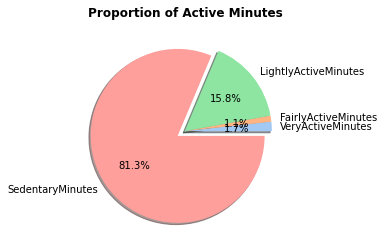

In [65]:
#Visualising the proportion of active minutes in a pie chart
VeryActiveMinutes = daily_activity['VeryActiveMinutes'].sum()
FairlyActiveMinutes= daily_activity['FairlyActiveMinutes'].sum()
LightlyActiveMinutes= daily_activity['LightlyActiveMinutes'].sum()
SedentaryMinutes= daily_activity['SedentaryMinutes'].sum()
label = ['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']
data = [VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes]
explode = (0.0,0.0,0.0,0.1)
colors = sns.color_palette('pastel')
plt.pie(data, colors = colors,autopct = '%1.1f%%',labels=label,shadow=True, explode =explode)
plt.title('Proportion of Active Minutes',fontweight='bold')
plt.show()

### Findings:
From the describe table, we can see that on average the total logged time is about 1219 mins or 20 hrs. Average active time is 228 mins or 3.8hrs. Average Sedentary time is about 991 mins or 16.5 hrs which can consists of activity like sitting infront of the computer, watching tv etc. From the pie chart above, Sedentary minutes is obeserved to have large proportion of the total logged time which will be investigated subsequently. 

It is also observed that the mean total steps taken is considered low at an average of 7638 steps. This is about 25% lower than what is recommended by the health promotion board. 

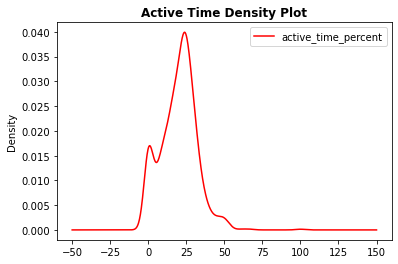

In [80]:
#plotting of density plot to display average Active time  
pd.DataFrame(daily_activity['active_time_percent']).plot(kind='density',color='red') 
plt.title('Active Time Density Plot',fontweight='bold')
plt.show()


### Findings:
Once again from density plot, the peak shows where the values are concentrated over the interval. 
Most of the active time are about 20% - 25% of the total logged time.
This also means that most of the time are actually sedentary minutes. 


In [67]:
#Creating a new dataframe from using selected columns for easier analysis 
active_dist_df = pd.DataFrame([daily_activity['VeryActiveDistance'],daily_activity['ModeratelyActiveDistance'],
                  daily_activity['LightActiveDistance'],daily_activity['SedentaryActiveDistance'],
                              daily_activity['Calories'],daily_activity['total_active_time']]).T


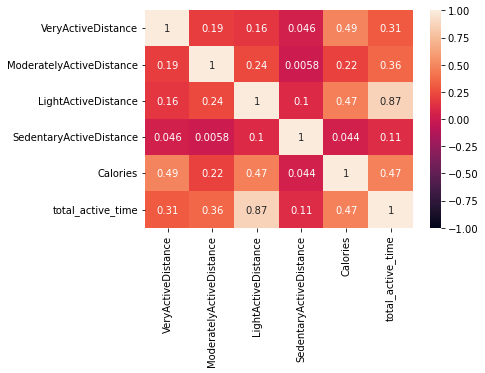

In [68]:
#creating heatmap to display correlation between the various active distance,calories and active time
sns.heatmap(active_dist_df.corr(),annot= True,vmin=-1,vmax=1)
plt.show()

#### Findings:
From the above correlation plot that is between the type of active distances, it can be observed that the positive correlation between the Very Active Distance and Calories ,Light Active Distance and Calories are quite similar. It is also noted that there is very strong postive correlation between Total Active Time and Light Active Distance indicating larger proportion of time is spent on light active distance. Hence, spending just more time by engaging in Light Active Distance can also burnt almost similar calories as compared to high intensity workouts. This can be a motivation for people as daily light exercises such as walking can help them go far in acheiving their fitness goals. 


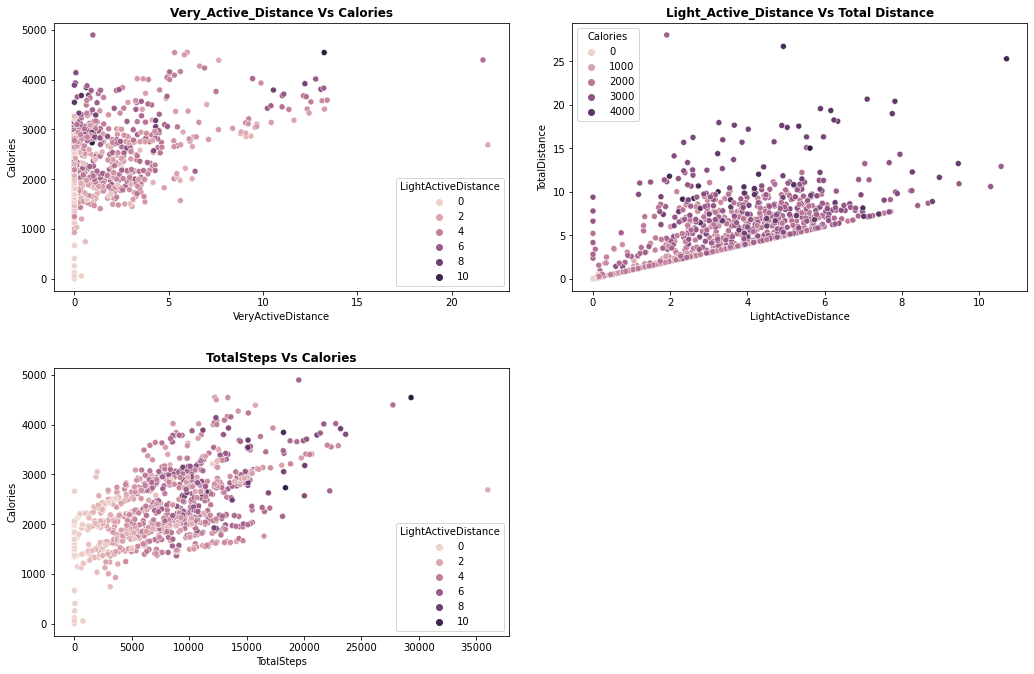

In [69]:
#Creating scatterplot corroborate the above findings
f,axs = plt.subplots(2,2,
                      figsize=(15,10),
                      sharey=False)
sns.scatterplot(x=daily_activity['VeryActiveDistance'],y=daily_activity['Calories'],
                hue= daily_activity['LightActiveDistance'],
                ax=axs[0,0]).set_title('Very_Active_Distance Vs Calories',fontdict= {'fontweight':'bold'})

sns.scatterplot(x=daily_activity['LightActiveDistance'],y=daily_activity['TotalDistance'],
                hue= daily_activity['Calories'],
                ax=axs[0,1]).set_title('Light_Active_Distance Vs Total Distance',fontdict= {'fontweight':'bold'})

sns.scatterplot(x=daily_activity['TotalSteps'],y=daily_activity['Calories'],
                hue= daily_activity['LightActiveDistance'],ax=axs[1,0]).set_title('TotalSteps Vs Calories',fontdict= {'fontweight':'bold'})

axs[1,1].set_axis_off()

#increasing the spacing between the plot
plt.tight_layout(pad=3.0)

plt.show()

To further reinforce the above findings, in the Very_Active_Distance Vs Calories scatter plot, higher Light Active Distance is observed to have higher calories burnt even though majority of Very Active Distance is recorded at between 0 km to 5km. 

In the Light_Active_Distance Vs Total Distance scatter plot,it can be observed that there is higher calories burnt from 3km and above of Light Active Distance. Most of the samples falls in the range of between 3km and 6 km of Light Active Distance out of about 10km of Total Distance. 

Lastly, in the TotalSteps Vs Calories plot, it can be observed that higher LightActiveDistance is seen in the higher Calories region. 

In [70]:
#importing a 2nd dataset SleepDay into Dataframe. This Dataset set contains the sleep hours and hours in bed 
sleepDay_df = pd.read_csv('/Users/eric/Downloads/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')

In [71]:
#Checking whether there are missing values in the dataset 
#all rows return a false indicating there are no missing values in the dataset
print(sleepDay_df.isna())
sleepDay_df.isna().nunique()

        Id  SleepDay  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed
0    False     False              False               False           False
1    False     False              False               False           False
2    False     False              False               False           False
3    False     False              False               False           False
4    False     False              False               False           False
..     ...       ...                ...                 ...             ...
408  False     False              False               False           False
409  False     False              False               False           False
410  False     False              False               False           False
411  False     False              False               False           False
412  False     False              False               False           False

[413 rows x 5 columns]


Id                    1
SleepDay              1
TotalSleepRecords     1
TotalMinutesAsleep    1
TotalTimeInBed        1
dtype: int64

In [72]:
# checking no of unique users in daily_activity dataframe
daily_activity_unique_id = pd.unique(daily_activity['Id']) 
print('Unique ids in daily_activity df:',len(daily_activity_unique_id))

# checking no of unique users in daily_activity dataframe
sleepDay_unique_id = pd.unique(sleepDay_df['Id'])
print('Unique ids in sleep_unique_id df:',len(sleepDay_unique_id))


#checking how many of the ids in sleep_unique_id matches daily_activity_unique_id
print('No of matched ids between daily_activity df & sleepDay_df :',len(set(daily_activity_unique_id) & set(sleepDay_unique_id)),'matches')

Unique ids in daily_activity df: 33
Unique ids in sleep_unique_id df: 24
No of matched ids between daily_activity df & sleepDay_df : 24 matches


There are only 24 out of the 33 fitbit users recording their sleep.

In [73]:
# checking the makeup of the data set 
sleepDay_df.info()
sleepDay_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [74]:
#Displaying the general statistics of the dataset 
sleepDay_df.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [77]:
#Changing SleepDay object to datetime to change the format of the date
sleepDay_df['SleepDay']= pd.to_datetime(sleepDay_df['SleepDay'])

# Segregate date from datetime into a new column 
sleepDay_df['date'] = sleepDay_df['SleepDay'].dt.date
sleepDay_df['date']= pd.to_datetime(sleepDay_df['date'])

# standardise the format of date for subsequent merge between daily_activity table and SleepDay table
sleepDay_df['date'] = sleepDay_df["date"].dt.strftime("%-m/%-d/%Y")
sleepDay_df['date']= pd.to_datetime(sleepDay_df['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
 5   date                413 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(4)
memory usage: 19.5 KB


In [78]:
#Merging the daily_activity and sleepDay_df using left join method on 2 conditions; Id and date  
merge_df =daily_activity.merge(sleepDay_df,on=['Id','date'],how='left')

# dropping rows from merged table where ids from sleepDay table is not in daily_activity table
merged_df =merge_df.dropna()

# checking if the newly merge table contain only 24 unique ids as verified earlier 
print(len(pd.unique(merged_df['Id'])))



24


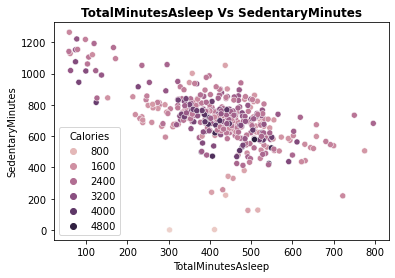

In [79]:
# Creating scatter plot to dispolay the relatioship between Total minutes asleep and Sedentary Minutes 
sns.scatterplot(x=merged_df['TotalMinutesAsleep'],y=merged_df['SedentaryMinutes'],
                hue= merged_df['Calories']).set_title('TotalMinutesAsleep Vs SedentaryMinutes'
                                                      ,fontdict= {'fontweight':'bold'})
plt.show()

### 5) Findings:

From the scatterplot above we can see that the higher range of calories burnt are scattered between sleep time of 350 minutes to about 500 minutes. Also there is a negative relationship between Sedentary minutes and TotalMinutesAsleep. Adequate sleep can in a way led to lower sedentary minutes which balances off sendentary activites like sedentary working positions or watching tv etc, which might even reduce snacking. Better sleep quality provides more energy to engage in more active minutes which in turn result in higher calories burnt. 

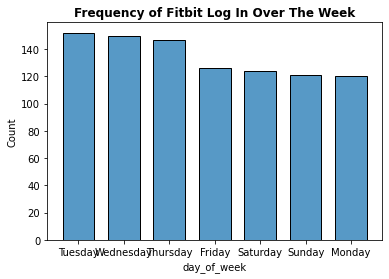

In [40]:
# lastly displaying the frequency of logged in to fitbit device over the week
sns.histplot(daily_activity['day_of_week'],shrink=.7)
plt.title('Frequency of Fitbit Log In Over The Week',fontweight='bold')
plt.show()

### Findings: 

A obvious pattern is being observed from the barchart above that users tend to use their fitbit devices more during the midweek to track their activites and tends to decline towards the weekend and where Monday is being the lowest.


### Act

Hypothesis is that only people who engage in high intensity workouts will have more calories burnt. There is no doubt in that. However from my findings above, it is observed that light active activites is also important for burning calories. Spending more time and being consistent in light activities can also produce great or similar results. 

On top of that users are spending a large amount of time in sedentary minutes (81.3% of total time) instead of using their devices to motivate their workouts. As per findings, highlighted above, having adequate sleep hours can reduce sedentary minutes which can led to more productive active minutes, hence calories burn. It is observed that average sleep hours is at 419 minutes which is close to 7hrs. That is pretty close to the recommened 7 to 9 hrs as shown in studies for healthy adults to fuction their best. 

Lastly, users tend to use their device more during mid week and slowed over the weekend. 

### Recommedation to Bellabeat marketing team. 

1) Include educational content in Bellabeat app to hightlight the importance on how simple exercises and also more sleep hours can have a positive impact on health. These baby steps that they take along the way should decrease overall sedentary minutes. 

2) Set slow increamental goals to motivate users along the way and highlight the results of their effort via visualisations and using dashboard to show their achievments like how much calories was consumed and burnt along the way. 

3) Provide weekly updates on sleep patterns and have reminder notifications if there is a consistent drop in sleep hours.

4) Encourage users to have a healthy lifestyle by providing notifcations during the weekend to give a subtle push for them to engage in more pysical activites over the weekend. This can done by providing suggestions on what activities they can engage in as per their geographical locations or cities,e.g. an upcoming marathon or cycling event which they can sign up. 
